# A notebook to visualise the tracks

In [1]:
import anaconfig


In [2]:
import os.path as op
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from Preprocessing.preprocessing import load_dataframes
from utils.plotutils.plotconfig import configure_matplotlib
from utils.plotutils.plotools import save_fig
configure_matplotlib()


In [30]:
hits_particles, particles = load_dataframes(
    indir="/scratch/acorreia/minbias-sim10b-xdigi/92",
)


In [35]:
hits_particles_true = hits_particles[hits_particles["particle_id"] != 0].merge(
    particles[["event_id", "particle_id", "has_velo", "phi"]],
    on=["event_id", "particle_id"],
    how="left",
)


In [36]:
event_ids = hits_particles["event"].unique()


In [37]:
event_idx = 15

event_hits_particles = hits_particles[hits_particles["event"] == event_ids[event_idx]]
particles = particles[particles["event"] == event_ids[event_idx]]


In [7]:
def plot_event(hits_particles: pd.DataFrame, show_tracks: bool = False):
    fig, ax = plt.subplots(figsize=(30, 6))

    df_hits = hits_particles.drop_duplicates(["hit_id"])
    
    ax.axhline(y=0, color='k')
    ax.scatter(
        x=df_hits["z"],
        y=df_hits["x"],
        color="grey",
        s=2,
    )
    ax.set_xlabel("$z$ (cm)")
    ax.set_ylabel("$x$ (cm)")
    ax.set_ylim(-50.0, 50.0)
    ax.set_xlim(-290.0, 760.0)
    ax.grid(color="grey", alpha=0.5)
    ax.set_aspect(1)

    if show_tracks:
        for (_, hits_particle) in hits_particles.groupby(by=["event", "particle_id"]):
            hit_coordinates = hits_particle.sort_values(by="z")
            ax.plot(
                hit_coordinates["z"],
                hit_coordinates["x"],
                linestyle="-",
                linewidth=1.0,
                marker=None,
            )
    return fig, ax

Figure was saved in /home/acorreia/etx4velo/etx4velo/output/preliminary/hits_xz.svg


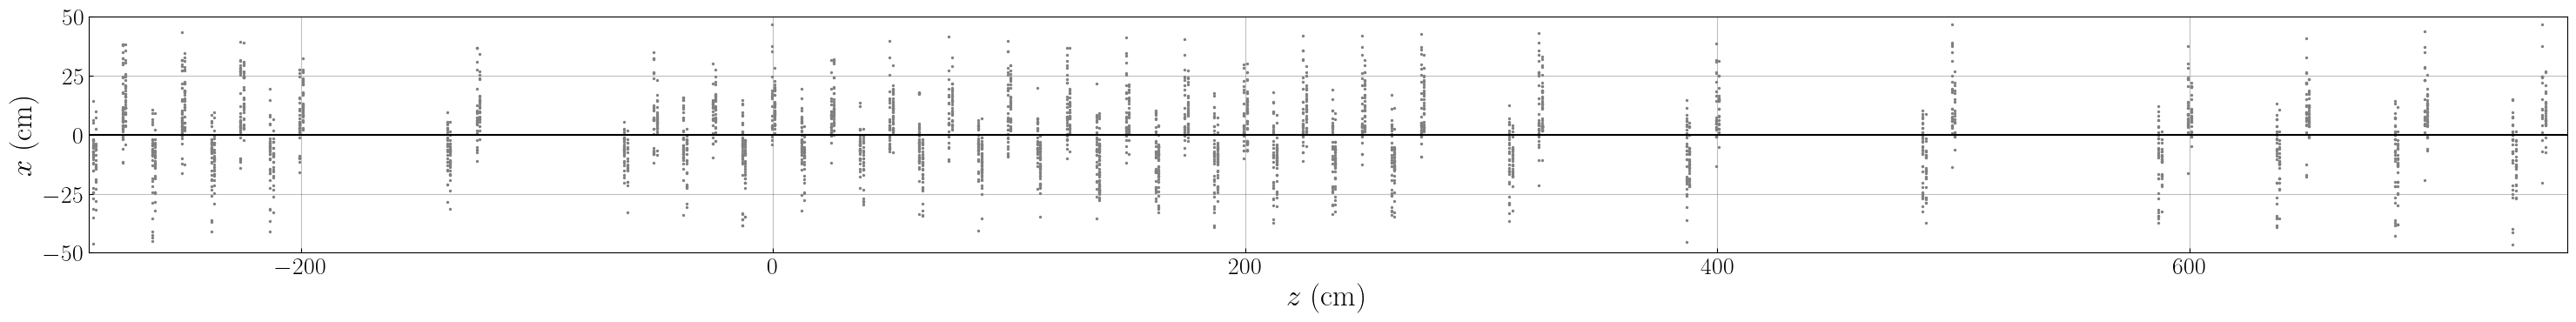

In [8]:
fig, ax = plot_event(hits_particles=event_hits_particles)
save_fig(fig, op.join(anaconfig.PLOTDIR, "hits_xz"), dpi=300, exts=[".svg"])

Figure was saved in /home/acorreia/etx4velo/etx4velo/output/preliminary/hits_tracks_xz.svg


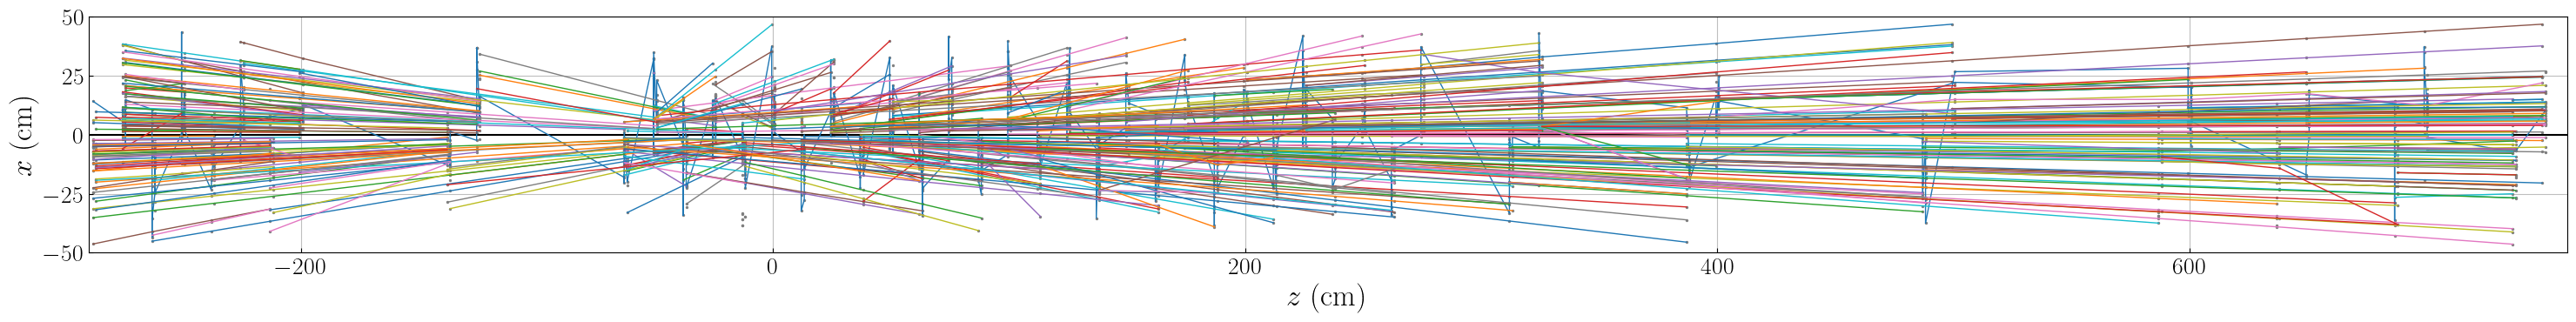

In [9]:
fig, ax = plot_event(hits_particles=event_hits_particles, show_tracks=True)
save_fig(fig, op.join(anaconfig.PLOTDIR, "hits_tracks_xz"), dpi=300, exts=[".svg"])

In [57]:
def plot_xy_graph(
    df_hits_particles: pd.DataFrame,
    n_tracks: int,
    n_events: int = 10,
    seed: int | None = None,
):
    fig1, ax1 = plt.subplots(figsize=(12, 12))
    fig2, ax2 = plt.subplots(figsize=(12, 5))
    axes = [ax1, ax2]

    for ax in axes:
        ax.axhline(y=0.0, color="k", linewidth=0.5)
        ax.axvline(x=0.0, color="k", linewidth=0.5)

    event_ids = df_hits_particles["event"].unique()

    rng = np.random.default_rng(seed=seed)
    rng.shuffle(event_ids)

    for idx, (_, hits_particle) in enumerate(
        df_hits_particles[
            df_hits_particles["event"].isin(event_ids[:n_events])
        ].groupby(
            by=["event", "particle_id"]
        )
    ):
        label = f"{hits_particle['phi'].unique()[0] / np.pi:.2f} $\pi$"
        hit_coordinates = hits_particle.sort_values(by="plane")
        ax1.plot(
            hit_coordinates["y"],
            hit_coordinates["x"],
            linestyle="-",
            markersize=5.0,
            marker="o",
            label=label,
        )
        ax2.plot(
            hit_coordinates["z"],
            hit_coordinates["x"],
            linestyle="-",
            markersize=5.0,
            marker="o",
            label=label,
        )
        if idx > n_tracks:
            break

    for ax in axes:
        ax.set_ylim(-50.0, 50.0)
        ax.grid(color="grey", alpha=0.5)
    
    ax1.set_xlim(-50.0, 50.0)
    ax2.set_xlim(-570, 470)
    ax1.legend(fontsize=12)
    ax2.legend(fontsize=12)
    ax1.set_xlabel("$y$")
    ax1.set_ylabel("$x$")
    ax2.set_xlabel("$z$")
    ax2.set_ylabel("$x$")
    return fig1, ax1, fig2, ax2


(<Figure size 1200x1200 with 1 Axes>,
 <Axes: xlabel='$y$', ylabel='$x$'>,
 <Figure size 1200x500 with 1 Axes>,
 <Axes: xlabel='$z$', ylabel='$x$'>)

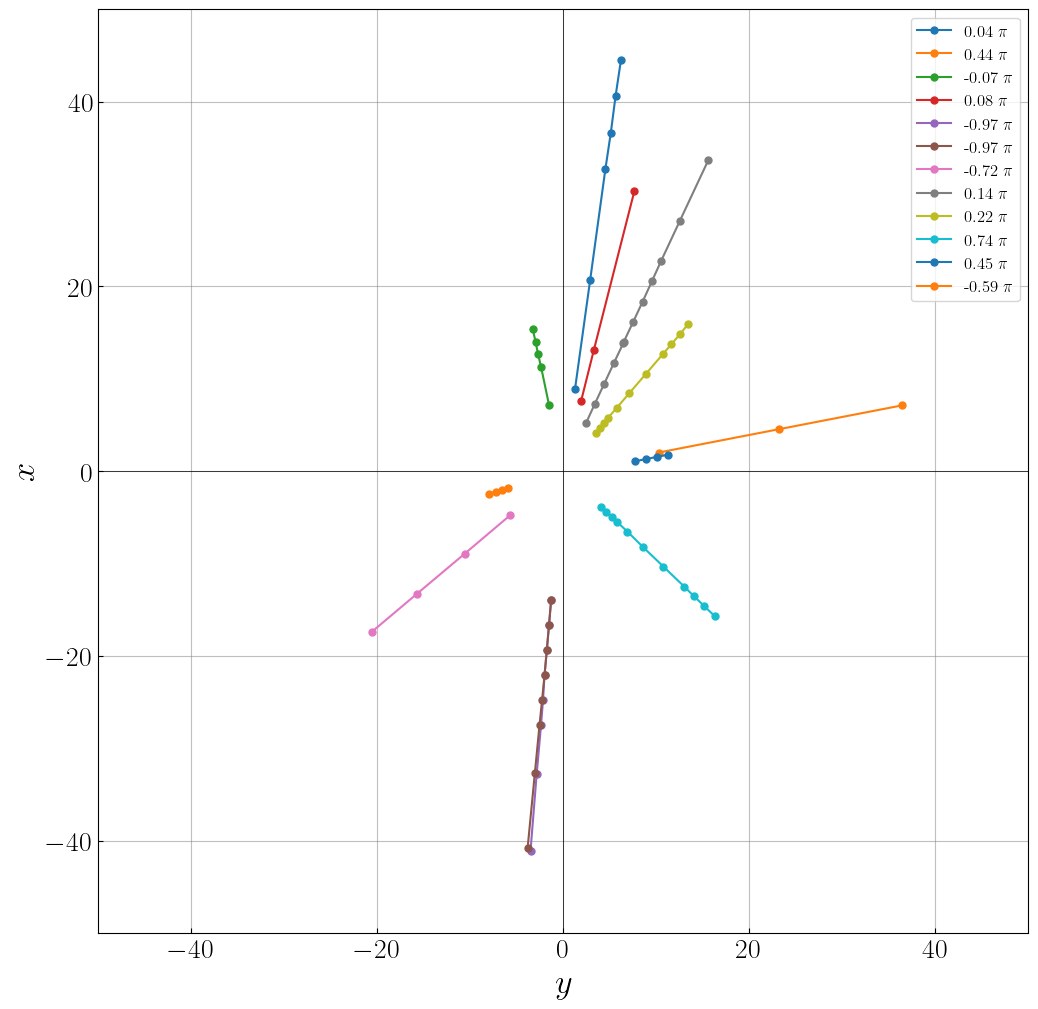

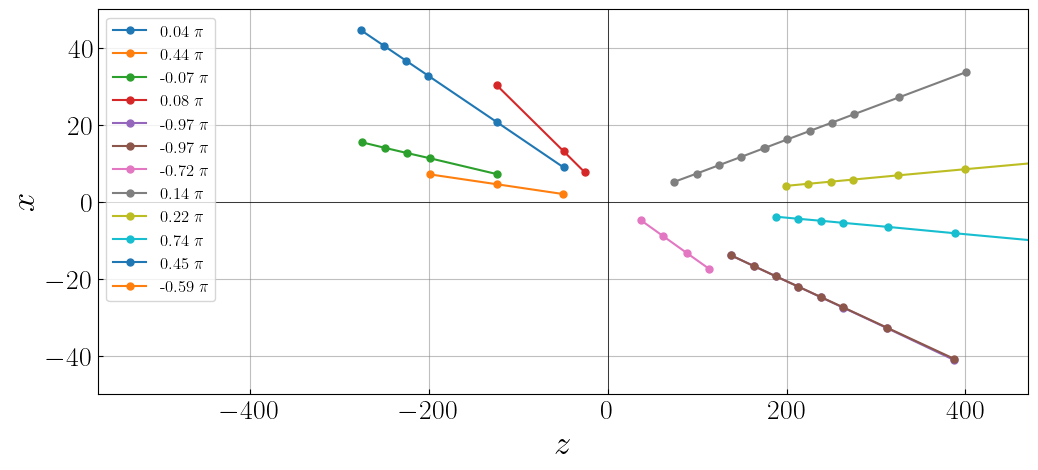

In [58]:
plot_xy_graph(
    df_hits_particles=hits_particles_true[hits_particles_true["has_velo"]],
    n_tracks=10,
)